## Manhattan plot
#### R programing

In [20]:
library(qqman)

In [21]:
head(gwasResults)

SNP,CHR,BP,P
rs1,1,1,0.9148060
rs2,1,2,0.9370754
rs3,1,3,0.2861395
rs4,1,4,0.8304476
rs5,1,5,0.6417455
rs6,1,6,0.5190959


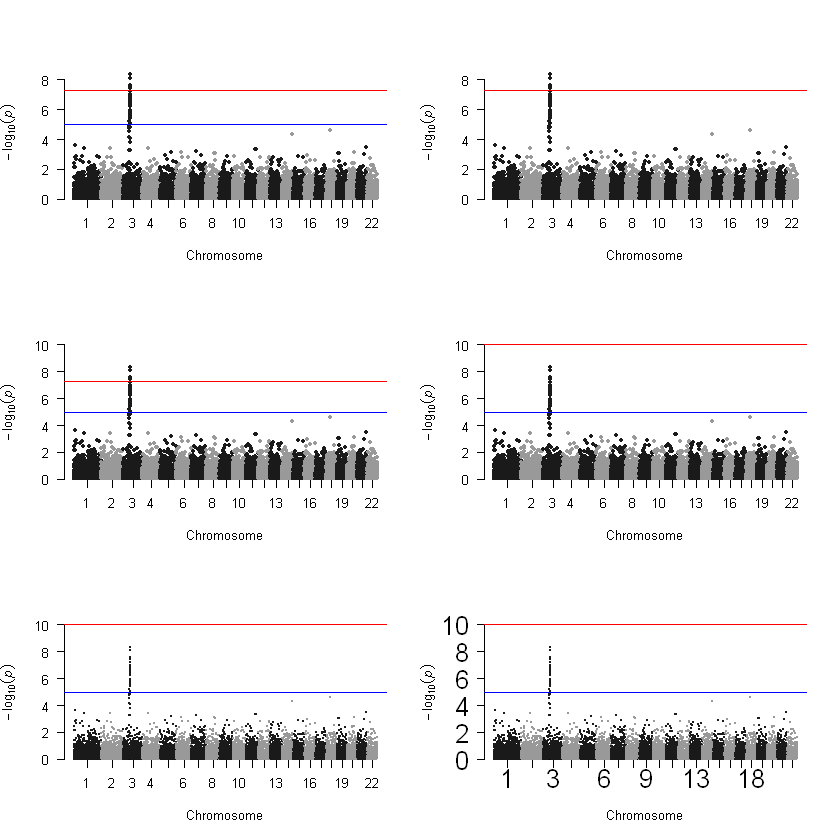

In [27]:
par(mfrow = c(3,2))
manhattan(gwasResults)
manhattan(gwasResults,suggestiveline = F)
manhattan(gwasResults,ylim = c(0,10))
manhattan(gwasResults,genomewideline = 10,ylim = c(0,10))
manhattan(gwasResults,genomewideline = 10,ylim = c(0,10),cex = 0.5)
manhattan(gwasResults,genomewideline = 10,ylim = c(0,10),cex = 0.5,cex.axis = 2)

In [28]:
manhattan

function (x, chr = "CHR", bp = "BP", p = "P", snp = "SNP", col = c("gray10", 
    "gray60"), chrlabs = NULL, suggestiveline = -log10(1e-05), 
    genomewideline = -log10(5e-08), highlight = NULL, logp = TRUE, 
    annotatePval = NULL, annotateTop = TRUE, ...) 
{
    CHR = BP = P = index = NULL
    if (!(chr %in% names(x))) 
        stop(paste("Column", chr, "not found!"))
    if (!(bp %in% names(x))) 
        stop(paste("Column", bp, "not found!"))
    if (!(p %in% names(x))) 
        stop(paste("Column", p, "not found!"))
    if (!(snp %in% names(x))) 
        warning(paste("No SNP column found. OK unless you're trying to highlight."))
    if (!is.numeric(x[[chr]])) 
        stop(paste(chr, "column should be numeric. Do you have 'X', 'Y', 'MT', etc? If so change to numbers and try again."))
    if (!is.numeric(x[[bp]])) 
        stop(paste(bp, "column should be numeric."))
    if (!is.numeric(x[[p]])) 
        stop(paste(p, "column should be numeric."))
    d = data.frame(CHR = x[[chr]], BP = x[[bp]], P = x[[p]])
    if (!is.null(x[[snp]])) 
        d = transform(d, SNP = x[[snp]])
    d <- subset(d, (is.numeric(CHR) & is.numeric(BP) & is.numeric(P)))
    d <- d[order(d$CHR, d$BP), ]
    if (logp) {
        d$logp <- -log10(d$P)
    }
    else {
        d$logp <- d$P
    }
    d$pos = NA
    d$index = NA
    ind = 0
    for (i in unique(d$CHR)) {
        ind = ind + 1
        d[d$CHR == i, ]$index = ind
    }
    nchr = length(unique(d$CHR))
    if (nchr == 1) {
        d$pos = d$BP
        ticks = floor(length(d$pos))/2 + 1
        xlabel = paste("Chromosome", unique(d$CHR), "position")
        labs = ticks
    }
    else {
        lastbase = 0
        ticks = NULL
        for (i in unique(d$index)) {
            if (i == 1) {
                d[d$index == i, ]$pos = d[d$index == i, ]$BP
            }
            else {
                lastbase = lastbase + tail(subset(d, index == 
                  i - 1)$BP, 1)
                d[d$index == i, ]$pos = d[d$index == i, ]$BP + 
                  lastbase
            }
            ticks = c(ticks, (min(d[d$index == i, ]$pos) + max(d[d$index == 
                i, ]$pos))/2 + 1)
        }
        xlabel = "Chromosome"
        labs <- unique(d$CHR)
    }
    xmax = ceiling(max(d$pos) * 1.03)
    xmin = floor(max(d$pos) * -0.03)
    def_args <- list(xaxt = "n", bty = "n", xaxs = "i", yaxs = "i", 
        las = 1, pch = 20, xlim = c(xmin, xmax), ylim = c(0, 
            ceiling(max(d$logp))), xlab = xlabel, ylab = expression(-log[10](italic(p))))
    dotargs <- list(...)
    do.call("plot", c(NA, dotargs, def_args[!names(def_args) %in% 
        names(dotargs)]))
    if (!is.null(chrlabs)) {
        if (is.character(chrlabs)) {
            if (length(chrlabs) == length(labs)) {
                labs <- chrlabs
            }
            else {
                warning("You're trying to specify chromosome labels but the number of labels != number of chromosomes.")
            }
        }
        else {
            warning("If you're trying to specify chromosome labels, chrlabs must be a character vector")
        }
    }
    if (nchr == 1) {
        axis(1, ...)
    }
    else {
        axis(1, at = ticks, labels = labs, ...)
    }
    col = rep(col, max(d$CHR))
    if (nchr == 1) {
        with(d, points(pos, logp, pch = 20, col = col[1], ...))
    }
    else {
        icol = 1
        for (i in unique(d$index)) {
            with(d[d$index == unique(d$index)[i], ], points(pos, 
                logp, col = col[icol], pch = 20, ...))
            icol = icol + 1
        }
    }
    if (suggestiveline) 
        abline(h = suggestiveline, col = "blue")
    if (genomewideline) 
        abline(h = genomewideline, col = "red")
    if (!is.null(highlight)) {
        if (any(!(highlight %in% d$SNP))) 
            warning("You're trying to highlight SNPs that don't exist in your results.")
        d.highlight = d[which(d$SNP %in% highlight), ]
        with(d.highlight, points(pos, logp, col = "gr

In [31]:
library(heatmap3)
